# Assignment 5: PCA and Clustering (40 marks)
### Due: December 6 at 11:59pm 
(Dropbox will remain open until December 8 at 11:59pm)

### Name: 

The purpose of this assignment is to practice using PCA and clustering techniques on a given dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Part 1: Principle Component Analysis (PCA) (18 marks)

### Step 1. Load data (2 marks)

You have been asked by an agricultural company to help them predict the type of wheat based on kernel characteristics. You have been given all the information you need in the seeds_dataset.txt file on D2L. The original dataset can be found [here](https://archive.ics.uci.edu/dataset/236/seeds)

The first step is to read in the file using pandas and inspect the first few columns. Note that the data is in a text file, so the separator is different compared to a csv file.

In [11]:
# TODO: Import dataset and inspect the first five columns

column_names = [
    "area",
    "perimeter",
    "compactness",
    "length_of_kernel",
    "width_of_kernel",
    "asymmetry_coefficient",
    "grove_length",
    "wheat_type"
]

df = pd.read_csv("./seeds_dataset.txt", sep="\s+", names=column_names)
df.head()

# print(df.isnull().sum())

,area,perimeter,compactness,length_of_kernel,width_of_kernel,asymmetry_coefficient,grove_length,wheat_type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


Next, you will need to separate the data into your feature matrix and target vector.

In [9]:
# TODO: Separate the data into feature matrix and target vector. Print the shape of X and y
X = df[column_names[:-1]]
y = df[column_names[-1]]

print("Shape of X (features): ", X.shape)
print("Shape of y (target): ", y.shape)

Shape of X (features):  (210, 7)
Shape of y (target):  (210,)


### Step 2: Preprocessing (2 marks)

To preprocess the data, we will need to scale the data. Which scaler would you select and why? *(1 mark)* 

I would expect this data to follow some range of Gaussian distribution,  thus I would intend to use a standardization scaling.

Before we implement the scaler, we need to split the data into training and testing sets first.

In [13]:
# TODO: Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
# TODO: Print the shape of the training feature matrix and target vector

print("Shape of training (features): ", X_train.shape)
print("Shape of training (target): ", y_train.shape)


Shape of training (features):  (168, 7)
Shape of training (target):  (168,)


Now that we have our training data, we can implement our selected scaler.

In [15]:
# TODO: Scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Step 3: Model Selection (1 mark)

The next step is to instantiate our selected model. In this case, we will be using `LogisticRegression()`

In [18]:
# TODO: Instantiate model

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()


### Step 4: Validation (2 marks)

To validate the results, we need to use cross-validation. To make sure we are using the best hyperparmeters, we can use a grid search. The parameter grid has been provided below.

In [17]:
param_grid = {'C': [0.01, 0.1, 1.0, 10.0],
             'fit_intercept': [True, False]}

In [19]:
#TODO: Implement the grid search and print the best parameters, cross-validation score and test score
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(model, param_grid, cv=5)

grid_search.fit(X_train_scaled, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)
print("Test set score:", grid_search.score(X_test_scaled, y_test))

Best parameters: {'C': 10.0, 'fit_intercept': True}
Best cross-validation score: 0.9467023172905525
Test set score: 0.9523809523809523


### Step 5: Visualize using PCA (3 marks)

Now you can visualize the results from Step 4 using PCA. Use the best parameters from the previous step to predict the label for the testing data. For the plot, each data point must be colored based on the class label.

In [20]:
# TODO: Predict y labels using best estimator
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

y_pred = grid_search.best_estimator_.predict(X_test_scaled)

In [21]:
# TODO: Reduce dimensions of test data for plotting
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test_scaled)

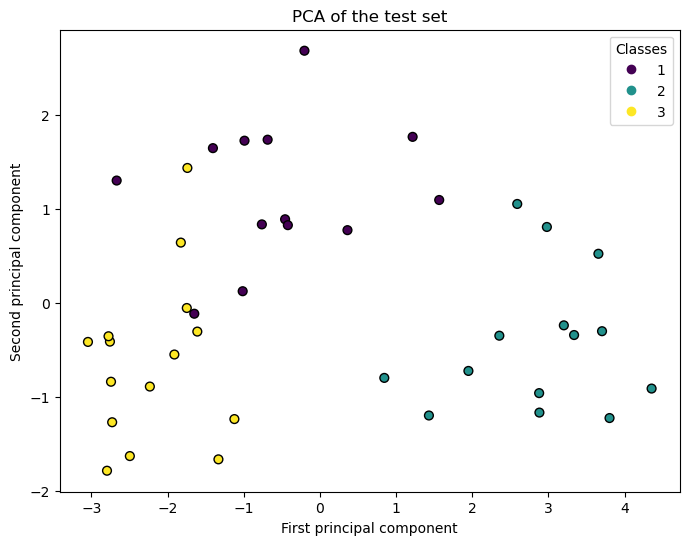

In [22]:
# TODO: Plot test points colored by predicted label
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_pred, cmap='viridis', edgecolor='k', s=40)
plt.title("PCA of the test set")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
plt.legend(*scatter.legend_elements(), title="Classes")
plt.show()

#### Questions (4 marks)

1. Did the logistic regression model work well for this dataset? Why would you make this conclusion? *(2 marks)*
1. Did PCA work well for this model? How does this relate to the results from the model used? *(2 marks)*

*ANSWER HERE*

#### Answers

1) Yeah,  we got cross validation and training scores of ~95%,  both really close, so low bias and variance. 
2) Yes,  we had good separation from the classes,  so it seemed like it worked good.  PCA and log reg are both linear, and since we got such good results we can assume that the dataset is linear also, as the PCA worked great with the log reg model behind it. 


### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

Lots of the code was sourced right from assignment 4,  as well as some from the lecture notes and examples, and some home brew.  I completed the steps in order as they were requested, as really I dont think there is much other way to do it here. I did use some generative AI when I was curious about what scaler was the best for the given data, and how to make assumptions based on that,  more a Q & A than anything to further details outlined in the book and in teh class notes, I also use generative AI to help me make plots,  as they ususally have more pretty ones than me.   I didnt have any particular challenges, other than really understanding and grasping the concept of the PCA plot.  I didnt really understand what was intended by changing the number of dimensions until I read the lecture examples and udnerstood it was just to make a X-Y plot.  

## Part 2. Implement clustering (20 marks)

The agricultural company approaches you again because they lost all the labels for their data. Use the Kmeans clustering method to assign labels to the seeds dataset used in Part 1.

### Step 1: Cluster using original data (6 marks)

This part of the assignment asks you to implement Kmeans clustering using the orginal feature matrix (after scaling has been performed). 

In [41]:
# TODO: Scale feature matrix
df2 = pd.read_csv("./seeds_dataset.txt", sep="\s+", header=None)
df2.head()

X2 = df2.iloc[:, :-1] 
y2 = df2.iloc[:, -1]   


scaler2 = StandardScaler()

X2_scaled = scaler2.fit_transform(X2)


The first step is to use the elbow method to determine the optimal number of clusters. In this case, you can use the distortion metric.

c:\Users\puhrich\AppData\Local\anaconda3\envs\ENSF611\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\puhrich\AppData\Local\anaconda3\envs\ENSF611\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\puhrich\AppData\Local\anaconda3\envs\ENSF611\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\puhrich\AppData\Local\anaconda3\envs\ENS

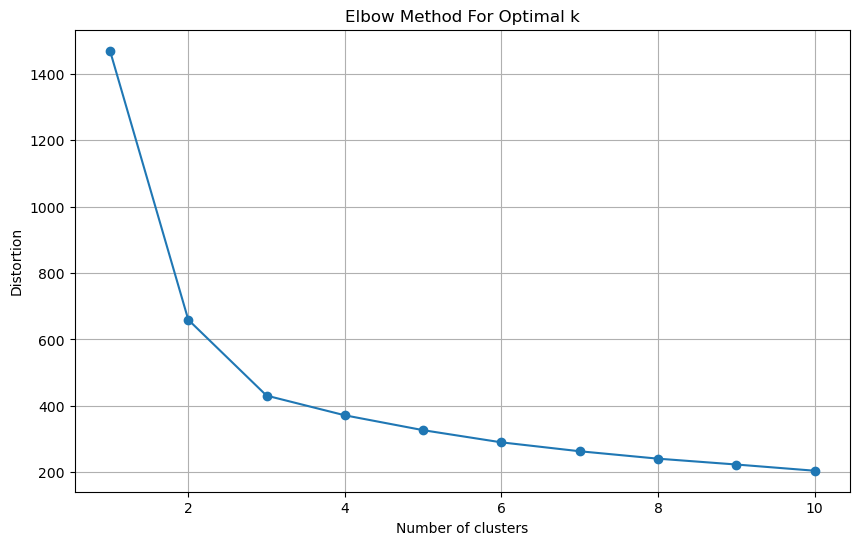

In [42]:
# TODO: Use the elbow method to determine the optimal number of clusters

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

cluster_range = range(1,11)

distortions = []

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, n_init=10,  random_state=42)

    kmeans.fit(X2_scaled)

    distortions.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(cluster_range, distortions, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.grid(True)
plt.show()

Next, implement Kmeans and calculate the following validation metrics:
- Silhouette score
- Calinski-Harabasz score
- Davies-Bouldin score

In [45]:
# TODO: Implement K-means with the number of clusters determined in the previous step
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)

kmeans.fit(X2_scaled)

clusters = kmeans.predict(X2_scaled)

c:\Users\puhrich\AppData\Local\anaconda3\envs\ENSF611\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [46]:
# TODO: Calculate the three different validation metrics
from sklearn import metrics

silhouette_score = metrics.silhouette_score(X2_scaled, clusters)

caslinski_harabasz_score = metrics.calinski_harabasz_score(X2_scaled, clusters)

davies_bouldin_score = metrics.davies_bouldin_score(X2_scaled, clusters)

silhouette_score, caslinski_harabasz_score, davies_bouldin_score

(0.40072705527512986, 249.7841749161647, 0.9278712249013426)

Plot the clustering results using PCA. Remember to color each data point based on the cluster label.

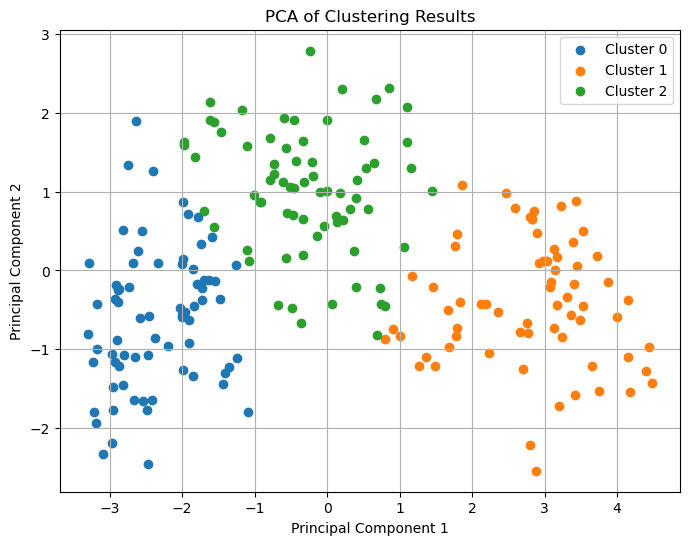

In [51]:
# TODO: Plot clustering results
pca2 = PCA(n_components=2)
X2_pca2 = pca2.fit_transform(X2_scaled)

plt.figure(figsize=(8,6))

for i in range(3):  # Assuming you have 3 clusters
    plt.scatter(X2_pca2[clusters == i, 0], X2_pca2[clusters == i, 1], label=f'Cluster {i}')

plt.title('PCA of Clustering Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

### Step 2: Cluster using PCA-transformed data (4 marks)

Implement Kmeans clustering using PCA-transformed data. The first step is to use the explained variance ratio to find the number of components required to explain at least 95% of the variance.

2

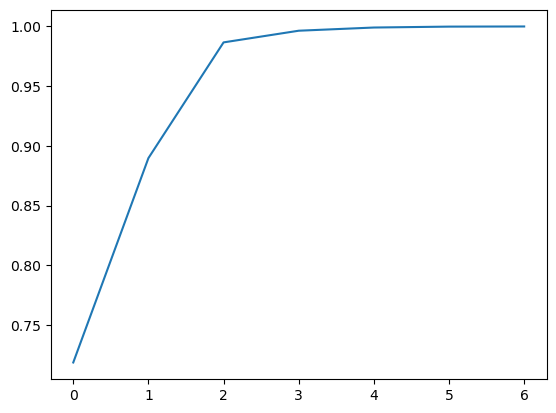

In [62]:
# TODO: Find the number of principal components using explained variance ratio
pcax = PCA().fit(X2_scaled)
X2_pcax = pcax.fit_transform(X2_scaled)

explained_variance = np.cumsum(pcax.explained_variance_ratio_)

plt.plot(explained_variance)
n_components_95 = np.where(cumm_variance >= 0.95)[0][0]
n_components_95

Next, transform the data using PCA, implement Kmeans and calculate the three validation metrics used in the previous step.

In [63]:
# TODO: Use PCA to transform the data
pca_95 = PCA(n_components=n_components_95)
X2_pca_95 = pca_95.fit_transform(X2_scaled)

In [64]:
# TODO: Implement K-means with the transformed data

kmeans_pca = KMeans(n_clusters=3, n_init=10, random_state=42)  # Adjust the number of clusters if needed
kmeans_pca.fit(X2_pca_95)
clusters_pca = kmeans_pca.predict(X2_pca_95)

c:\Users\puhrich\AppData\Local\anaconda3\envs\ENSF611\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [65]:
# TODO: Calculate the three different validation metrics

silhouette_score = metrics.silhouette_score(X2_pca_95, clusters_pca)

caslinski_harabasz_score = metrics.calinski_harabasz_score(X2_pca_95, clusters_pca)

davies_bouldin_score = metrics.davies_bouldin_score(X2_pca_95, clusters_pca)

silhouette_score, caslinski_harabasz_score, davies_bouldin_score

(0.4934304869603191, 397.301078386368, 0.7066734757979803)

### Step 3: Display results (2 marks)

Print the results for Steps 2 and 3 in a table. Include column and row labels

In [66]:
# TODO: Display results
results_df = pd.DataFrame(X2_pca_95, columns=[f'PC{i+1}' for i in range(X2_pca_95.shape[1])])


results_df['Cluster'] = clusters_pca
print(results_df.head())

        PC1       PC2  Cluster
0  0.317047  0.783669        2
1 -0.003386  1.913214        2
2 -0.459443  1.907225        2
3 -0.591936  1.931069        2
4  1.102910  2.068090        2


#### Questions (4 marks)

1. Did the optimal number of clusters make sense based on the context? *(1 mark)*
1. Compare the PCA plot from Part 2 step 1 to the PCA plot from Part 1. Did we get similar results? *(1 mark)*
1. How many components did you use for the PCA analysis? Did using PCA improve your results? Why or why not? *(2 marks)*


*ANSWER HERE*

1) Yeah,  pretty striaghtforward,  there was three different types of wheat, so three different class labels makes sense.  
2) Yeah,  they looked failry similar, with closeish test results. 
3) It took 2 components to explain at leaste 95% of the variance.  The PCA did change and improve my results, though not entirely sure if it improved it a material amount.  I know that reducing the number of features will help, as is the case here, however I am unsure of where the point of diminishing returns is with this.  


### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

Some of my code from from the lecture notes and examples, and some home brew, adn lots of google, stackoverflow, gpt.  I completed the steps in order as they were requested, as really I dont think there is much other way to do it here. Lots of help from google and GPT here,  more so in understanding "why" I was doing the things I was doing, vs anything else.  I really try to get a good understanding of what is happening rather than just read and try to understand afterwards.  I did have some challenges in understanding all the steps through part 2, and understanding what was going on and why, but at the end and with enough reading I think I got through it.   Putting my examples into GPT, and asking it "why is this working this way" really helped me understand things.  I think it is a great tool for that, and depending on the outlook of how you want to complete your assignment, these things can be tremendously helpful in learning.  

Seeing here where the PCA changed the results and why, was really interesting to see the real life examples of when these applications make sense. 

## Part 3: Reflection (2 marks)
Include a sentence or two about:
- what you liked or disliked,
- found interesting, confusing, challangeing, motivating
while working on this assignment.


This assignment was the hardest one yet, I had a bit of a tough time with the second part, but I think I ended up getting it eventually after reading over many class examples and attempting forever.  The first part really set out the process,  however the second part really got confusing into the "why" of what was happening.  However after it was over I could undestand it better.  It was good to see how k means can give you similar results without labelled data, so that was very interesting to see, and i can understand the applications of that.  So that was really nice.  